In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
RawData = pd.read_excel('Levin.xlsx', index_col= False)
RawData.set_index(['Year','Day'],inplace=True)
RawData.where(RawData.applymap(lambda x: isinstance(x, (int, float))),np.nan,inplace=True)
RawData.where(RawData>-90,np.nan,inplace=True)
for c in RawData.columns:
    RawData.loc[:,c] = pd.to_numeric(RawData.loc[:,c])

In [30]:
CleanData = RawData.copy()
CleanData.loc[:,'MinT'].where(CleanData.loc[:,'MinT']>-10,-99,inplace=True)
CleanData.loc[:,'MaxT'].where(CleanData.loc[:,'MaxT']<35,-99,inplace=True)
CleanData.loc[:,'Rain'].where(CleanData.loc[:,'Rain']<200,-99,inplace=True)
CleanData.loc[:,'Radn'].where(CleanData.loc[:,'Radn']<35,-99,inplace=True)
CleanData.loc[:,'Wind'].where(CleanData.loc[:,'Wind']<1000,-99,inplace=True)
CleanData.loc[:,'vp'].where(CleanData.loc[:,'vp']<27,-99,inplace=True)

In [31]:
CleanData.to_csv('LivinClean.met',sep='\t',header=False)

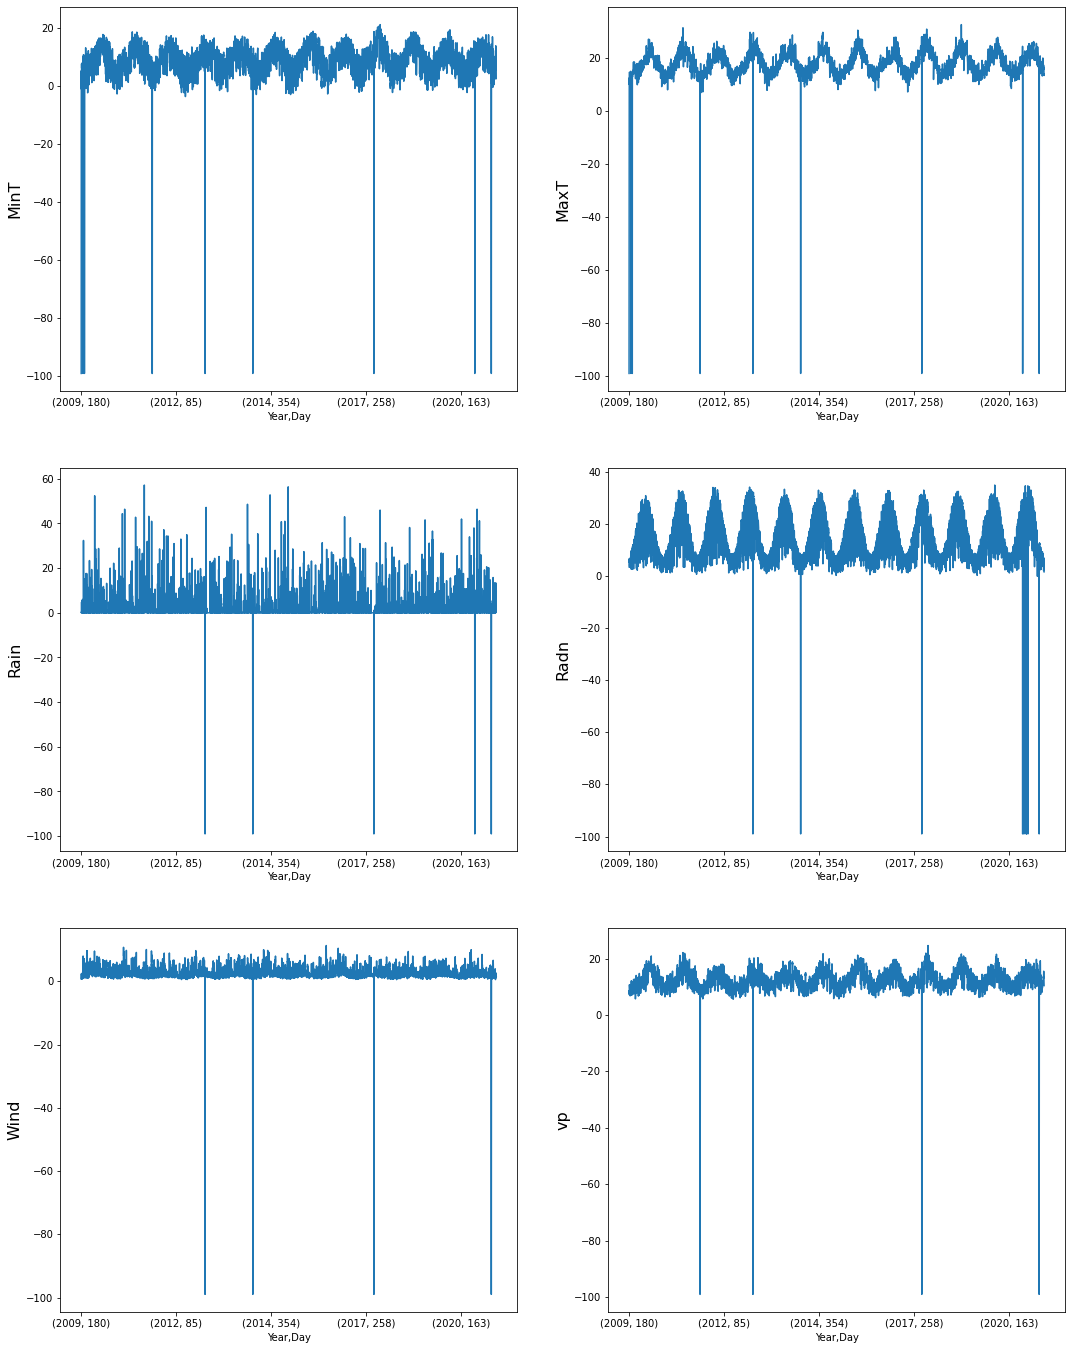

In [32]:
Fig = plt.figure(figsize = (18,24))
Position = 1
for x in CleanData.columns:
    Fig.add_subplot(3,2,Position)
    CleanData.loc[:,x].plot()
    plt.ylabel(x,fontsize = 16)
    Position +=1

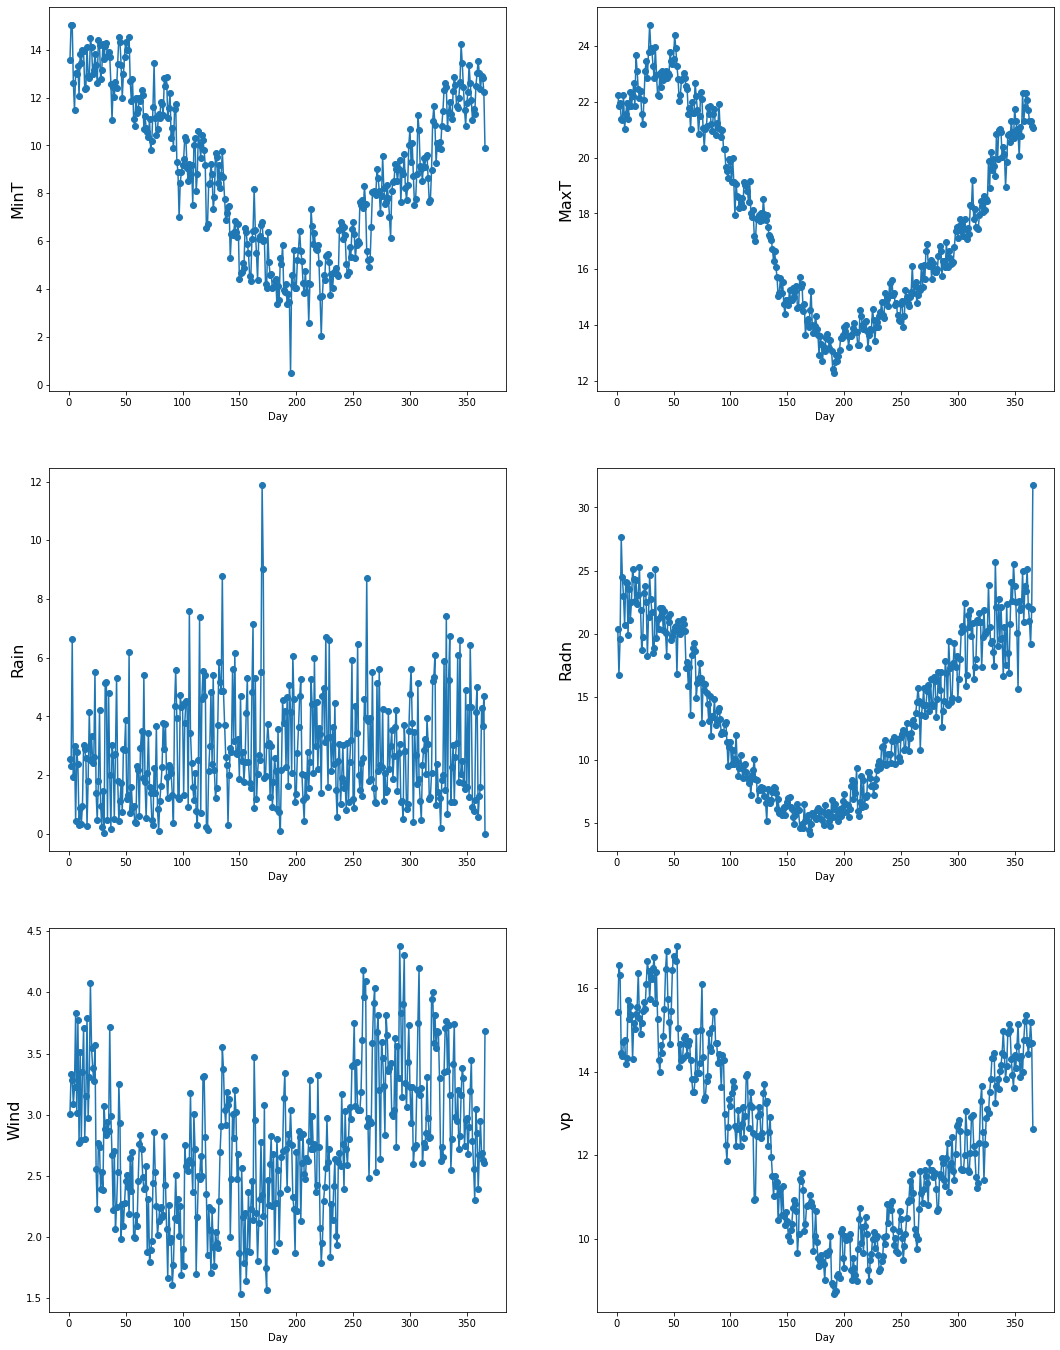

In [34]:
Fig = plt.figure(figsize = (18,24))
Position = 1
for x in RawData.columns:
    Fig.add_subplot(3,2,Position)
    Means = RawData.groupby(level='Day').mean()
    Means.loc[:,x].plot(marker='o')
    plt.ylabel(x,fontsize = 16)
    Position +=1

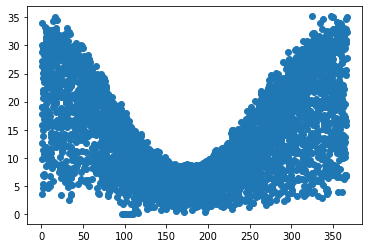

In [35]:
DayIndexed = RawData.copy()
DayIndexed.index = DayIndexed.index.droplevel('Year')
plt.plot(DayIndexed.index,DayIndexed.loc[:,'Radn'],'o')
